In [40]:
import requests
import pandas
import numpy

from statsmodels.tsa.arima.model import ARIMA

from matplotlib import pyplot
from matplotlib import ticker

In [30]:
channel_id = 1293177
field_id = 1
limit = 4000

response = requests.get(f"https://api.thingspeak.com/channels/{channel_id}/fields/{field_id}.json?results={limit}")
data = response.json()

print(data)

{'channel': {'id': 1293177, 'name': 'San Diego - Estación Meteorológica', 'description': 'San Diego, Cerro Largo, Uruguay\r\nEstación Meteorológica Solar\r\n(Temp, Hum, Presion, Lluvia, Viento).\r\nESP8266, UNO R3, DTH 22, BMP 280\r\nUpdate Interval - 15 seg\r\nhttps://clima.santiago.ovh/', 'latitude': '-31.9939484', 'longitude': '-53.9575388', 'field1': 'Temperatura C°', 'field2': 'Humedad %', 'field3': 'Pres. Atmosférica a Nivel de Estación (hPa)', 'field4': 'Pres. Atmosférica a Nivel del Mar (hPa)', 'field5': 'Viento', 'field6': 'Precipitación (mm)', 'field7': 'Dirección del Viento', 'field8': 'UV', 'created_at': '2021-01-30T16:32:32Z', 'updated_at': '2023-04-12T20:39:38Z', 'elevation': '136', 'last_entry_id': 3159802}, 'feeds': [{'created_at': '2023-04-11T23:36:57Z', 'entry_id': 3155803, 'field1': '23.90'}, {'created_at': '2023-04-11T23:37:16Z', 'entry_id': 3155804, 'field1': '23.90'}, {'created_at': '2023-04-11T23:37:34Z', 'entry_id': 3155805, 'field1': '23.90'}, {'created_at': '2

In [31]:
dataset = pandas.DataFrame(data["feeds"])

# dataset['created_at'] = pandas.to_datetime(dataset['created_at'])

dataset.set_index("entry_id", inplace=True)

dataset.rename(columns={"field1": "value"}, inplace=True)

dataset

,created_at,value
entry_id,,
3155803,2023-04-11T23:36:57Z,23.90
3155804,2023-04-11T23:37:16Z,23.90
3155805,2023-04-11T23:37:34Z,23.90
3155806,2023-04-11T23:37:50Z,23.90
3155807,2023-04-11T23:38:08Z,23.90
...,...,...
3159798,2023-04-12T20:38:27Z,23.90
3159799,2023-04-12T20:38:46Z,23.80
3159800,2023-04-12T20:39:04Z,23.80


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 3155803 to 3159802
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  4000 non-null   object
 1   value       4000 non-null   object
dtypes: object(2)
memory usage: 93.8+ KB


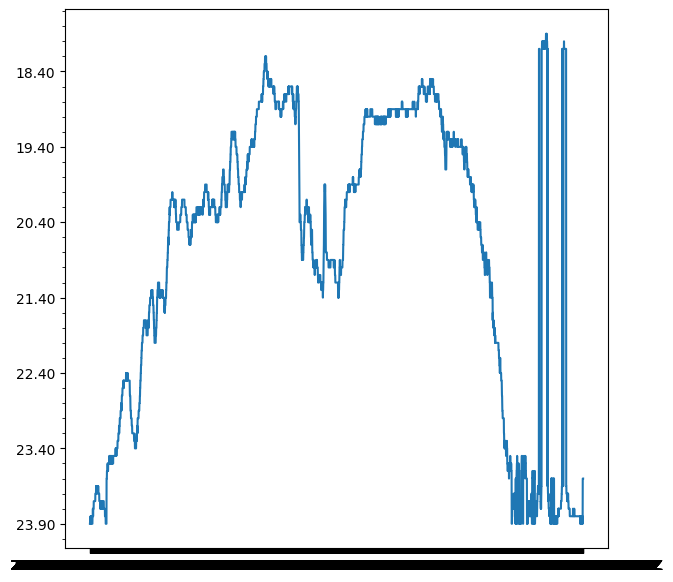

In [42]:
fig, ax = pyplot.subplots(figsize=(7, 7))

x = dataset["created_at"]
y = dataset["value"]

ax.plot(x, y)

ax.yaxis.set_major_locator(ticker.AutoLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

# ax.xaxis.set_major_locator(ticker.FixedLocator([0, 1, 5]))
# ax.xaxis.set_minor_locator(ticker.FixedLocator(numpy.linspace(0.2, 0.8, 4)))

# ax.set_yticks(ax.get_yticks()[::4])
# ax.set_xticks(ax.get_xticks()[::2])

pyplot.show()

In [34]:
split_size = int(len(dataset) * 0.8)

dataset_train = dataset[:split_size]
dataset_test = dataset[split_size:]

In [35]:
model = ARIMA(dataset_train, order=(1, 1, 1))
model_fit = model.fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen werecreated_at    object
value         object
dtype: object and None. The data was
                    created_at  value
entry_id                             
3155803   2023-04-11T23:36:57Z  23.90
3155804   2023-04-11T23:37:16Z  23.90
3155805   2023-04-11T23:37:34Z  23.90
3155806   2023-04-11T23:37:50Z  23.90
3155807   2023-04-11T23:38:08Z  23.90
...                        ...    ...
3158998   2023-04-12T16:26:17Z  20.80
3158999   2023-04-12T16:26:35Z  20.90
3159000   2023-04-12T16:26:54Z  20.90
3159001   2023-04-12T16:27:12Z  20.90
3159002   2023-04-12T16:27:28Z  21.00

[3200 rows x 2 columns]
and
 None
before. After,
[['2023-04-11T23:36:57Z' '23.90']
 ['2023-04-11T23:37:16Z' '23.90']
 ['2023-04-11T23:37:34Z' '23.90']
 ...
 ['2023-04-12T16:26:54Z' '20.90']
 ['2023-04-12T16:27:12Z' '20.90']
 ['2023-04-12T16:27:28Z' '21.00']]
None.